In [1]:
# Fonots

# Használathoz fel kell tölteni a metric_____.log filét ha Google Colabon használod.

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime, date, time

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

In [2]:
metric_file_name = 'metric_train_by_none.log'

In [3]:
df = pd.read_csv(metric_file_name, sep=',', header=0)

In [4]:
df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.170,19:53:41,19:53:3,930.98410,467.099750,1,1.2,39.1,49.6,44.1,...,0.0,15.0,14.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,192.168.0.170,19:53:44,19:53:4,1845.51100,1097.731846,1,1.3,65.2,19.9,73.5,...,0.0,26.2,24.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,192.168.0.170,19:53:53,19:53:5,3555.77575,1181.548318,2,6.6,94.8,0.1,99.6,...,0.0,27.3,27.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,192.168.0.170,19:54:01,19:54:0,1454.29850,607.638217,3,13.8,95.0,0.4,99.2,...,0.0,32.2,31.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,192.168.0.170,19:54:11,19:54:1,525.18795,248.146299,4,18.4,96.9,0.1,99.8,...,0.0,34.8,33.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df['worker_give_metrics'].unique()

array(['192.168.0.170'], dtype=object)

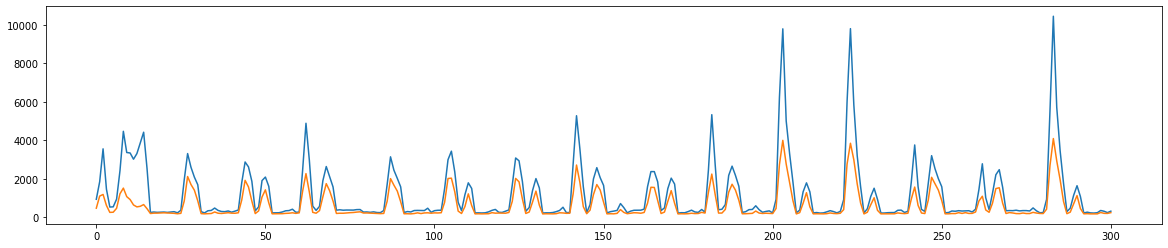

In [6]:
plt.figure(figsize=(20,4))
plt.plot(df['response_time_p95'])
plt.plot(df['response_time'])
plt.show()

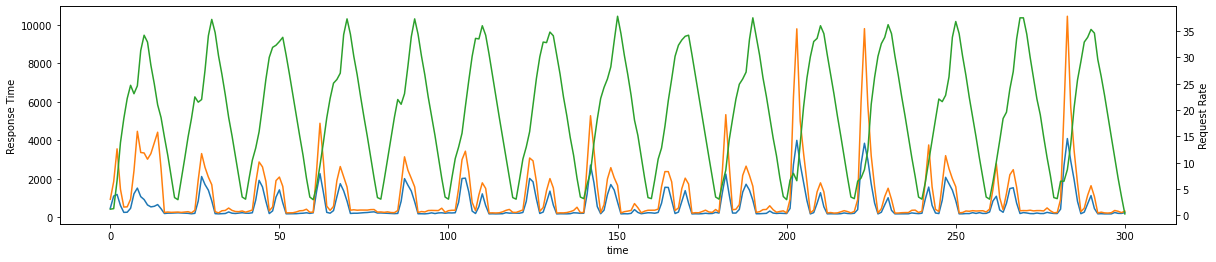

In [10]:

fig, ax1 = plt.subplots(figsize=(20, 4))

ax1.plot(df['response_time'], label = 'RT', color = 'C0')
ax1.plot(df['response_time_p95'], label = 'RT95%', color = 'C1')

ax2 = ax1.twinx()

ax2.plot(df['request_rate'], label = 'RR', color = 'C2')

ax1.set_xlabel('time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

plt.show()

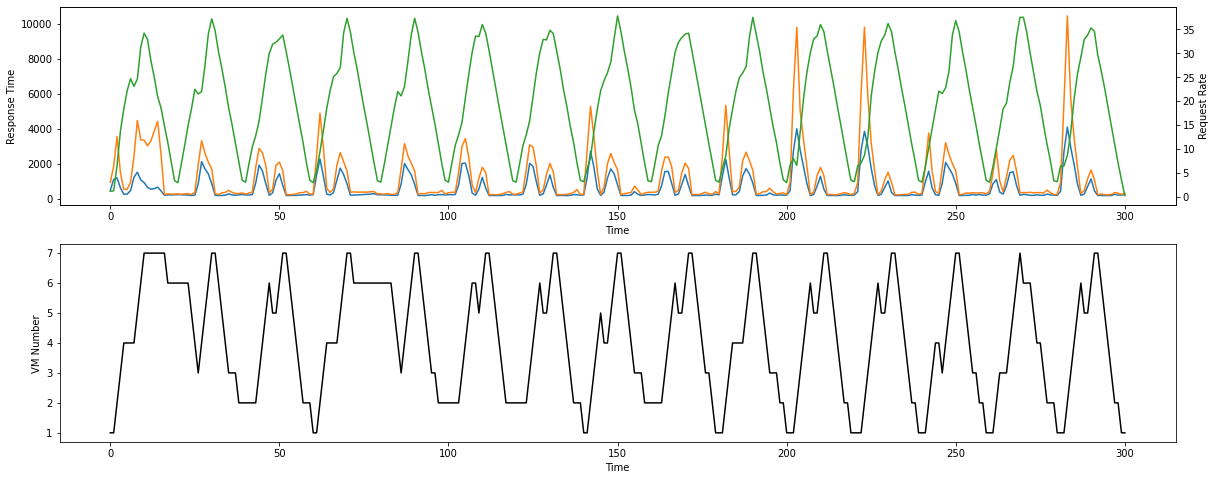

In [11]:

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

ax1.plot(df['response_time'], color = 'C0')
ax1.plot(df['response_time_p95'], color = 'C1')

ax2 = ax1.twinx()

ax2.plot(df['request_rate'], color = 'C2')

ax1.set_xlabel('Time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

ax3.plot(df['worker_number'], color = 'black')
ax3.set_xlabel('Time')
ax3.set_ylabel('VM Number')

plt.show()

In [12]:
df.iloc[:, 0:7].describe()

,response_time_p95,response_time,worker_number,request_rate
count,301.000000,301.000000,301.000000,301.000000
mean,1206.048009,628.363107,4.096346,19.416611
std,1538.289380,710.894331,1.895790,10.578033
min,212.638350,168.338860,1.000000,0.300000
25%,283.831650,191.465661,2.000000,10.700000
50%,375.352500,230.171559,4.000000,19.100000
75%,1785.410350,845.319734,6.000000,28.300000
max,10458.408600,4091.561379,7.000000,37.800000


In [13]:
df.columns

Index(['worker_give_metrics', 'write_to_csv_time', 'time', 'response_time_p95',
       'response_time', 'worker_number', 'request_rate', 'CPU0User%',
       'CPU0Idle%', 'CPU0Total%', 'CPU1User%', 'CPU1Idle%', 'CPU1Total%',
       '[DSK:sda]Reads', '[DSK:sda]RMerge', '[DSK:sda]RKBytes',
       '[DSK:sda]WaitR', '[DSK:sda]Writes', '[DSK:sda]WMerge',
       ' [DSK:sda]WKBytes', '[DSK:sda]WaitW', '[DSK:sda]Request',
       '[DSK:sda]QueLen', '[DSK:sda]Wait', '[DSK:sda]SvcTim', '[DSK:sda]Util',
       '[NUMA:0]Used', '[NUMA:0]Free', '[NUMA:0]Slab', '[NUMA:0]Mapped',
       '[NUMA:0]Anon', '[NUMA:0]AnonH', '[NUMA:0]Inactive', ' [NUMA:0]Hits',
       '[TCPD]InReceives', '[TCPD]InDelivers', '[TCPD]OutRequests',
       '[TCPD]InSegs', '[TCPD]OutSegs'],
      dtype='object')

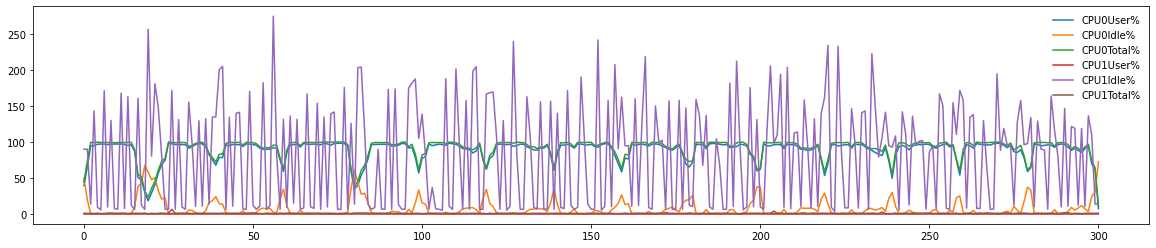

In [14]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
    if 'CPU' in col_name:
        plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()

In [15]:
df.iloc[:, 7:13].describe()

,CPU0User%,CPU0Idle%,CPU0Total%,CPU1User%,CPU1Idle%,CPU1Total%
count,301.000000,301.000000,301.000000,301.0,301.000000,301.000000
mean,88.363455,7.463455,91.292027,0.0,82.437542,0.857143
std,14.734967,12.181614,14.236999,0.0,72.900432,0.439231
min,7.300000,0.000000,10.500000,0.0,3.600000,0.200000
25%,88.400000,0.600000,91.000000,0.0,8.400000,0.800000
50%,94.900000,1.700000,97.800000,0.0,90.400000,0.800000
75%,96.600000,8.000000,99.300000,0.0,141.400000,0.900000
max,98.400000,72.600000,100.000000,0.0,274.900000,6.300000


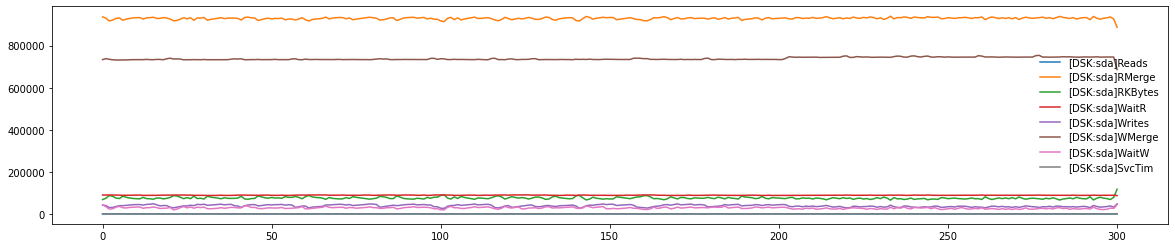

In [16]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
    if 'DSK' in col_name:
        if df[col_name].describe()[2] > 0:
            plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()

In [17]:
df.iloc[:, 13:26].describe()

,[DSK:sda]Reads,[DSK:sda]RMerge,[DSK:sda]RKBytes,[DSK:sda]WaitR,[DSK:sda]Writes,[DSK:sda]WMerge,[DSK:sda]WKBytes,[DSK:sda]WaitW,[DSK:sda]Request,[DSK:sda]QueLen,[DSK:sda]Wait,[DSK:sda]SvcTim,[DSK:sda]Util
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.0,301.000000,301.0,301.0,301.0,301.000000,301.0
mean,11.377741,929247.875083,75464.124917,88815.649169,38377.064452,737968.883721,0.0,28046.514286,100.0,0.0,0.0,30.244850,0.0
std,12.391043,5187.549936,5187.549936,654.700290,5126.902178,6487.977891,0.0,3975.164653,0.0,0.0,0.0,5.780641,0.0
min,0.500000,887466.400000,65249.600000,87274.000000,26262.000000,686157.200000,0.0,19345.200000,100.0,0.0,0.0,4.700000,0.0
25%,2.300000,926477.200000,72121.600000,88328.000000,34104.000000,733555.600000,0.0,24954.800000,100.0,0.0,0.0,27.900000,0.0
50%,6.700000,930193.600000,74518.400000,88650.800000,38224.800000,734521.200000,0.0,28185.600000,100.0,0.0,0.0,31.800000,0.0
75%,14.100000,932590.400000,78234.800000,89280.000000,43058.400000,744932.800000,0.0,30670.400000,100.0,0.0,0.0,33.600000,0.0
max,59.100000,939462.400000,117245.600000,90591.200000,48383.600000,753288.400000,0.0,43970.400000,100.0,0.0,0.0,42.900000,0.0


In [18]:
df.iloc[:, 26:34].describe()

,[NUMA:0]Used,[NUMA:0]Free,[NUMA:0]Slab,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits
count,301.0,301.0,301.0,301.0,301.000000,301.000000,301.0,301.0
mean,0.0,0.0,0.0,0.0,30.244850,29.666445,0.0,0.0
std,0.0,0.0,0.0,0.0,5.780641,5.613291,0.0,0.0
min,0.0,0.0,0.0,0.0,4.700000,4.900000,0.0,0.0
25%,0.0,0.0,0.0,0.0,27.900000,27.600000,0.0,0.0
50%,0.0,0.0,0.0,0.0,31.800000,31.200000,0.0,0.0
75%,0.0,0.0,0.0,0.0,33.600000,33.200000,0.0,0.0
max,0.0,0.0,0.0,0.0,42.900000,39.100000,0.0,0.0


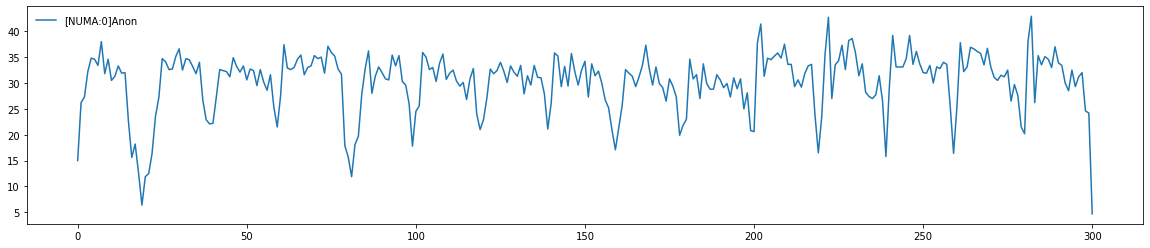

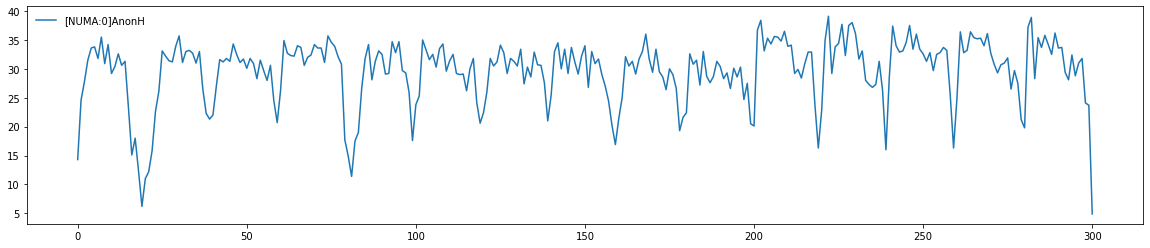

In [19]:
for col_name in df.columns:
    if 'NUMA' in col_name:
        if df[col_name].describe()[2] > 0:
            plt.figure(figsize=(20, 4))
            plt.ticklabel_format(useOffset=False)
            plt.ticklabel_format(style='plain')
            plt.plot(df[col_name], label = col_name)
            plt.legend(frameon=False)
            plt.show()

No handles with labels found to put in legend.


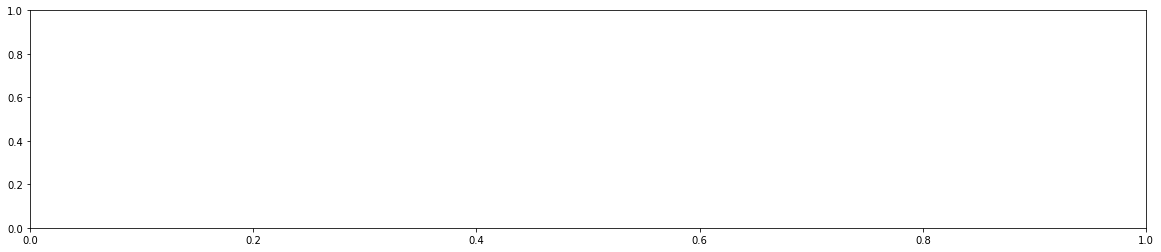

In [20]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
    if 'TCP' in col_name:
        if df[col_name].describe()[2] > 0:
            plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()

## CPU Threshod és Response Time Threshold

Két féle skálázást csináltam azonos terheléssel.

A két féle skálázásból származó log filokat beolvasom és összehasonlítom.

In [21]:
train_log_file_name  = 'scaled_train_by_none.log'

In [22]:
cf = pd.read_csv(train_log_file_name, sep=',', header=0)

In [23]:
print(cf.count()[0])

182


In [24]:
cf['otime'] = cf['time']

cf['time'] = cf['otime'].str[:-1]

In [25]:
cf.head()

,time,notification,actual_vm_number_was,actual_vm_number_is,otime
0,19:53:4,Worker 192.168.0.116 added.,1,2,19:53:44
1,19:53:5,Worker 192.168.0.46 added.,2,3,19:53:53
2,19:54:0,Worker 192.168.0.219 added.,3,4,19:54:01
3,19:54:4,Worker 192.168.0.233 added.,4,5,19:54:41
4,19:54:5,Worker 192.168.0.230 added.,5,6,19:54:51


In [26]:
cf['notification'].unique()

array(['Worker 192.168.0.116 added.', 'Worker 192.168.0.46 added.',
       'Worker 192.168.0.219 added.', 'Worker 192.168.0.233 added.',
       'Worker 192.168.0.230 added.', 'Worker 192.168.0.243 added.',
       'Worker 192.168.0.116 removed.', 'Worker 192.168.0.46 removed.',
       'Worker 192.168.0.219 removed.', 'Worker 192.168.0.233 removed.',
       'Worker 192.168.0.230 removed.', 'Worker 192.168.0.243 removed.'],
      dtype=object)

In [28]:
# ezt kell összeillesztenem a másik adatbázissal a time alapján

In [27]:
df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.170,19:53:41,19:53:3,930.98410,467.099750,1,1.2,39.1,49.6,44.1,...,0.0,15.0,14.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,192.168.0.170,19:53:44,19:53:4,1845.51100,1097.731846,1,1.3,65.2,19.9,73.5,...,0.0,26.2,24.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,192.168.0.170,19:53:53,19:53:5,3555.77575,1181.548318,2,6.6,94.8,0.1,99.6,...,0.0,27.3,27.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,192.168.0.170,19:54:01,19:54:0,1454.29850,607.638217,3,13.8,95.0,0.4,99.2,...,0.0,32.2,31.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,192.168.0.170,19:54:11,19:54:1,525.18795,248.146299,4,18.4,96.9,0.1,99.8,...,0.0,34.8,33.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
mf = df.merge(cf, on='time', how='left')

In [29]:
mf.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs,notification,actual_vm_number_was,actual_vm_number_is,otime
0,192.168.0.170,19:53:41,19:53:3,930.98410,467.099750,1,1.2,39.1,49.6,44.1,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,192.168.0.170,19:53:44,19:53:4,1845.51100,1097.731846,1,1.3,65.2,19.9,73.5,...,0.0,0.0,0.0,0.0,0.0,0.0,Worker 192.168.0.116 added.,1.0,2.0,19:53:44
2,192.168.0.170,19:53:53,19:53:5,3555.77575,1181.548318,2,6.6,94.8,0.1,99.6,...,0.0,0.0,0.0,0.0,0.0,0.0,Worker 192.168.0.46 added.,2.0,3.0,19:53:53
3,192.168.0.170,19:54:01,19:54:0,1454.29850,607.638217,3,13.8,95.0,0.4,99.2,...,0.0,0.0,0.0,0.0,0.0,0.0,Worker 192.168.0.219 added.,3.0,4.0,19:54:01
4,192.168.0.170,19:54:11,19:54:1,525.18795,248.146299,4,18.4,96.9,0.1,99.8,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [30]:
mf['delta_vm'] = mf['actual_vm_number_is'] - mf['actual_vm_number_was']

In [33]:
mf.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs,notification,actual_vm_number_was,actual_vm_number_is,otime,delta_vm
0,192.168.0.170,19:53:41,19:53:3,930.98410,467.099750,1,1.2,39.1,49.6,44.1,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,192.168.0.170,19:53:44,19:53:4,1845.51100,1097.731846,1,1.3,65.2,19.9,73.5,...,0.0,0.0,0.0,0.0,0.0,Worker 192.168.0.116 added.,1.0,2.0,19:53:44,1.0
2,192.168.0.170,19:53:53,19:53:5,3555.77575,1181.548318,2,6.6,94.8,0.1,99.6,...,0.0,0.0,0.0,0.0,0.0,Worker 192.168.0.46 added.,2.0,3.0,19:53:53,1.0
3,192.168.0.170,19:54:01,19:54:0,1454.29850,607.638217,3,13.8,95.0,0.4,99.2,...,0.0,0.0,0.0,0.0,0.0,Worker 192.168.0.219 added.,3.0,4.0,19:54:01,1.0
4,192.168.0.170,19:54:11,19:54:1,525.18795,248.146299,4,18.4,96.9,0.1,99.8,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [34]:
mf.columns

Index(['worker_give_metrics', 'write_to_csv_time', 'time', 'response_time_p95',
       'response_time', 'worker_number', 'request_rate', 'CPU0User%',
       'CPU0Idle%', 'CPU0Total%', 'CPU1User%', 'CPU1Idle%', 'CPU1Total%',
       '[DSK:sda]Reads', '[DSK:sda]RMerge', '[DSK:sda]RKBytes',
       '[DSK:sda]WaitR', '[DSK:sda]Writes', '[DSK:sda]WMerge',
       ' [DSK:sda]WKBytes', '[DSK:sda]WaitW', '[DSK:sda]Request',
       '[DSK:sda]QueLen', '[DSK:sda]Wait', '[DSK:sda]SvcTim', '[DSK:sda]Util',
       '[NUMA:0]Used', '[NUMA:0]Free', '[NUMA:0]Slab', '[NUMA:0]Mapped',
       '[NUMA:0]Anon', '[NUMA:0]AnonH', '[NUMA:0]Inactive', ' [NUMA:0]Hits',
       '[TCPD]InReceives', '[TCPD]InDelivers', '[TCPD]OutRequests',
       '[TCPD]InSegs', '[TCPD]OutSegs', 'notification', 'actual_vm_number_was',
       'actual_vm_number_is', 'otime', 'delta_vm'],
      dtype='object')

In [35]:
mf['worker_number'].isnull().values.any()

False

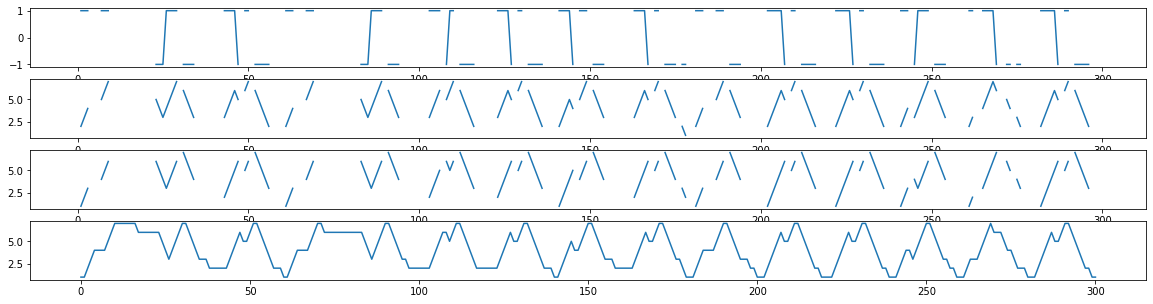

In [36]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5))

ax1.plot(mf['delta_vm'])
ax2.plot(mf['actual_vm_number_is'])
ax3.plot(mf['actual_vm_number_was'])
ax4.plot(mf['worker_number'])

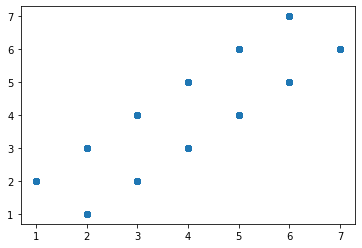

In [37]:
# Ellenőrzés (mert úgy tűnik, hogy a két adatbázisban az éppen aktuális VM szám mindhat egy kicsit mozogna)

plt.scatter(mf['worker_number'], mf['actual_vm_number_is'])

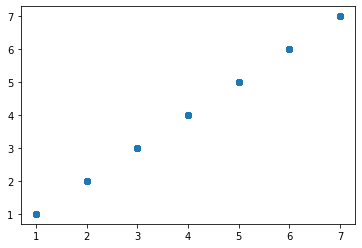

In [38]:
plt.scatter(mf['worker_number'], mf['actual_vm_number_was'])

In [39]:
# Ezt jó hogy megcsináltam (lásd a fenti ábrát)

# A 'actual_vm_number_was' == 'worker_number'

In [39]:
mf.columns

Index(['worker_give_metrics', 'write_to_csv_time', 'time', 'response_time_p95',
       'response_time', 'worker_number', 'request_rate', 'CPU0User%',
       'CPU0Idle%', 'CPU0Total%', 'CPU1User%', 'CPU1Idle%', 'CPU1Total%',
       '[DSK:sda]Reads', '[DSK:sda]RMerge', '[DSK:sda]RKBytes',
       '[DSK:sda]WaitR', '[DSK:sda]Writes', '[DSK:sda]WMerge',
       ' [DSK:sda]WKBytes', '[DSK:sda]WaitW', '[DSK:sda]Request',
       '[DSK:sda]QueLen', '[DSK:sda]Wait', '[DSK:sda]SvcTim', '[DSK:sda]Util',
       '[NUMA:0]Used', '[NUMA:0]Free', '[NUMA:0]Slab', '[NUMA:0]Mapped',
       '[NUMA:0]Anon', '[NUMA:0]AnonH', '[NUMA:0]Inactive', ' [NUMA:0]Hits',
       '[TCPD]InReceives', '[TCPD]InDelivers', '[TCPD]OutRequests',
       '[TCPD]InSegs', '[TCPD]OutSegs', 'notification', 'actual_vm_number_was',
       'actual_vm_number_is', 'otime', 'delta_vm'],
      dtype='object')

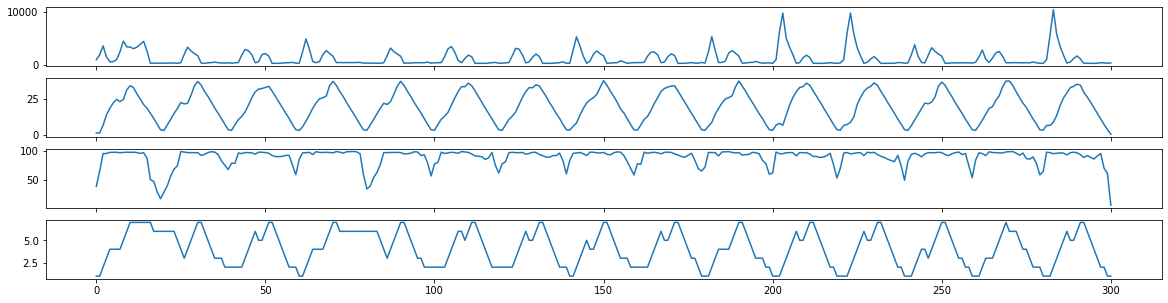

In [40]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5), sharex=True)

ax1.plot(mf['response_time_p95'])
ax2.plot(mf['request_rate'])
ax3.plot(mf['CPU0User%'])
ax4.plot(mf['worker_number'])

In [41]:
mf.columns

Index(['worker_give_metrics', 'write_to_csv_time', 'time', 'response_time_p95',
       'response_time', 'worker_number', 'request_rate', 'CPU0User%',
       'CPU0Idle%', 'CPU0Total%', 'CPU1User%', 'CPU1Idle%', 'CPU1Total%',
       '[DSK:sda]Reads', '[DSK:sda]RMerge', '[DSK:sda]RKBytes',
       '[DSK:sda]WaitR', '[DSK:sda]Writes', '[DSK:sda]WMerge',
       ' [DSK:sda]WKBytes', '[DSK:sda]WaitW', '[DSK:sda]Request',
       '[DSK:sda]QueLen', '[DSK:sda]Wait', '[DSK:sda]SvcTim', '[DSK:sda]Util',
       '[NUMA:0]Used', '[NUMA:0]Free', '[NUMA:0]Slab', '[NUMA:0]Mapped',
       '[NUMA:0]Anon', '[NUMA:0]AnonH', '[NUMA:0]Inactive', ' [NUMA:0]Hits',
       '[TCPD]InReceives', '[TCPD]InDelivers', '[TCPD]OutRequests',
       '[TCPD]InSegs', '[TCPD]OutSegs', 'notification', 'actual_vm_number_was',
       'actual_vm_number_is', 'otime', 'delta_vm'],
      dtype='object')

In [42]:
ff = mf[['time', 'otime', 'response_time', 'worker_number', 'request_rate', 'CPU0User%', 'actual_vm_number_was', 'actual_vm_number_is', 'delta_vm']].copy()

In [43]:
ff.head()

,time,otime,response_time,worker_number,request_rate,CPU0User%,actual_vm_number_was,actual_vm_number_is,delta_vm
0,19:53:3,NaN,467.099750,1,1.2,39.1,NaN,NaN,NaN
1,19:53:4,19:53:44,1097.731846,1,1.3,65.2,1.0,2.0,1.0
2,19:53:5,19:53:53,1181.548318,2,6.6,94.8,2.0,3.0,1.0
3,19:54:0,19:54:01,607.638217,3,13.8,95.0,3.0,4.0,1.0
4,19:54:1,NaN,248.146299,4,18.4,96.9,NaN,NaN,NaN


In [44]:
f2 = ff.reset_index(drop=True) # nem használom, de ha le kéne resetelni az indexet

In [45]:
# cpu' = c0 + c1 * cpu * worker_number/(worker_number + delta_vm) + c2 * cpu * delta_vm/(worker_number + delta_vm)

# m'   = c0 + c1 · m · w/(w + k) + c2 · m · k/(w + k)

In [46]:
# A time a metrikához tartozik
# a otime a scalerhez
# 19:57:4 kor mérünk valamit (91.6)
# --> az is egy külön jó kérdés, hogy ez mikor kerül birásra a rendszerbe (19:57:4 (0) vagy (9))
# ----> megoldás lehet, hogy beteszek a scaler programba egy időbőjeget is, hogy mikor íra be ezt az adatot

# A sclaer 19:57:42-kor végrehajt egy skálázást

# Ennek az eredménye logikus, hogy csak a 19:57:5 metric mérésnél jelenhet meg

In [47]:
f1 = ff.copy()
f1['CPU0User%Before'] = f1['CPU0User%'].shift(-1)
f1.head()

,time,otime,response_time,worker_number,request_rate,CPU0User%,actual_vm_number_was,actual_vm_number_is,delta_vm,CPU0User%Before
0,19:53:3,NaN,467.099750,1,1.2,39.1,NaN,NaN,NaN,65.2
1,19:53:4,19:53:44,1097.731846,1,1.3,65.2,1.0,2.0,1.0,94.8
2,19:53:5,19:53:53,1181.548318,2,6.6,94.8,2.0,3.0,1.0,95.0
3,19:54:0,19:54:01,607.638217,3,13.8,95.0,3.0,4.0,1.0,96.9
4,19:54:1,NaN,248.146299,4,18.4,96.9,NaN,NaN,NaN,97.1


In [48]:
# viszont csak ott kell figyelmebe venni a bf-af értéket ahol ténylegesen volt skálázás

In [49]:
f2 = f1.dropna()
f2.head(10)

,time,otime,response_time,worker_number,request_rate,CPU0User%,actual_vm_number_was,actual_vm_number_is,delta_vm,CPU0User%Before
1,19:53:4,19:53:44,1097.731846,1,1.3,65.2,1.0,2.0,1.0,94.8
2,19:53:5,19:53:53,1181.548318,2,6.6,94.8,2.0,3.0,1.0,95.0
3,19:54:0,19:54:01,607.638217,3,13.8,95.0,3.0,4.0,1.0,96.9
7,19:54:4,19:54:41,1217.314307,4,23.1,96.3,4.0,5.0,1.0,96.9
8,19:54:5,19:54:51,1511.132537,5,24.6,96.9,5.0,6.0,1.0,97.2
9,19:55:0,19:55:01,1067.601435,6,31.3,97.2,6.0,7.0,1.0,97.1
16,19:56:1,19:56:13,188.981342,7,14.9,50.6,7.0,6.0,-1.0,47.5
23,19:57:2,19:57:21,199.206275,6,14.9,68.5,6.0,5.0,-1.0,74.5
24,19:57:3,19:57:31,175.567707,5,18.4,74.5,5.0,4.0,-1.0,98.4
25,19:57:4,19:57:41,198.538556,4,22.5,98.4,4.0,3.0,-1.0,97.5


In [50]:
# cpu' = c0 + c1 * cpu * worker_number/(worker_number + delta_vm) + c2 * cpu * delta_vm/(worker_number + delta_vm)

# m'   = c0 + c1 · m · w/(w + k) + c2 · m · k/(w + k)

In [51]:
f3 = f2.copy()
f3['cpu_term1'] = f3['CPU0User%Before'] * f3['worker_number']/(f3['worker_number'] + f3['delta_vm'])
f3['cpu_term2'] = f3['CPU0User%Before'] * f3['delta_vm']/(f3['worker_number'] + f3['delta_vm'])

In [52]:
from sklearn.linear_model import LinearRegression

_cpu_x = f3[['cpu_term1', 'cpu_term2']]

_cpu_y = f3['CPU0User%']

_cpu_x.shape

_cpu_y.shape

lr = LinearRegression(fit_intercept=True)

rr = lr.fit(_cpu_x, _cpu_y)

rr.score(_cpu_x, _cpu_y)

0.6584472642261003

In [53]:
rr.coef_

array([0.62761736, 0.70141869])

In [54]:
rr.intercept_

34.21083536754479

In [55]:
pred_cpu = rr.predict(_cpu_x)

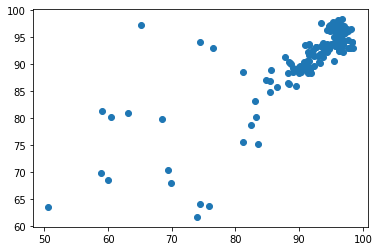

In [56]:
plt.scatter(f3['CPU0User%'], pred_cpu)

In [58]:
# Egy gyors ellenörzés -> hogy vátozna, ha a 'k' (delta_vm) számát én állítanám be

In [ ]:
# m'   = c0 + c1 · m · w/(w + k) + c2 · m · k/(w + k)

In [86]:
_cpu_usage = 90
_actual_vm = 3
_delta_vm = 1

_t1 = _cpu_usage * _actual_vm/(_actual_vm + _delta_vm)
_t2 = _cpu_usage * _delta_vm/(_actual_vm + _delta_vm)

_x = np.array([[_t1, _t2]])

print(_x.shape)
print(_x)

_pred = rr.predict(_x)

print(_pred)

# Durva, de az a helyzet, hogy a model azt mondja, hogy ha 1 darab VM-t hozzáadok akkor emelkedni fog a CPU Usage

(1, 2)
[[67.5 22.5]]
[92.3569279]


/home/ubuntu/notebook/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [88]:
# Állati jó kérdés, hogy a becslés miért 'ennyire szar' amikor az eredeti cikkben azt mondták, hogy viszonlag
# csekély hibával volt képes becsülni a lineáris regresszió a before after állapotot

# Megoldás:

# 1.

# Lehet, hogy ez az eredmény amúgy nem is annyira rossz.

# 2.

# Lehet, hogy mérés rögzítésénél valamit elbaszok

# 3.

# Lehet, hogy nem VM-től kéne lekérnem a metrikákat, hanem tényleg az összestől és azt a statisztikát rakni be

# x.

# Ezek lineáris kombinációja

In [89]:
import time
ost = time.time()

ost = time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())
print(ost)

ost = time.strftime("%H:%M:%S", time.gmtime())
print(ost)

2023-04-29 22:50:09
22:50:09


In [99]:
from sklearn.linear_model import LinearRegression
    
def create_model_for_metric(columnname: str, shift=-1):
    
    f1 = mf.copy()
    __before_name = columnname + 'Before'
    # f1[__before_name] = f1[columnname].shift(-1)           # Default
    f1[__before_name] = f1[columnname].shift(shift)          #
    
    f1 = f1.dropna()
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[__before_name] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[__before_name] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_X = f1[[__metric_term1, __metric_term2]]
    __metric_y = f1[columnname]

    lr = LinearRegression(fit_intercept=True)

    rr = lr.fit(__metric_X, __metric_y)

    __fit_score = rr.score(__metric_X, __metric_y)
    
    __fit_coef_ = rr.coef_
    
    __fit_intercept_ = rr.intercept_
    
    __pred_metric = rr.predict(__metric_X)
    
    plt.scatter(f1[columnname], __pred_metric)

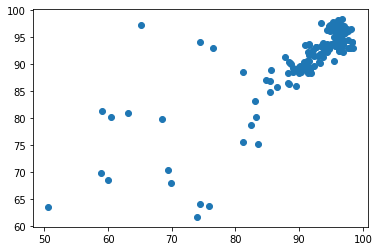

In [100]:
create_model_for_metric('CPU0User%')

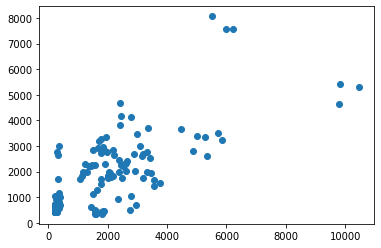

In [101]:
create_model_for_metric('response_time_p95')

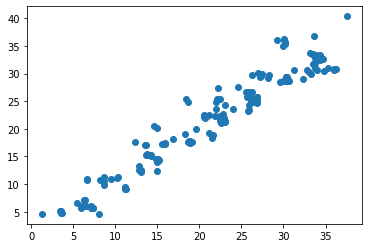

In [102]:
create_model_for_metric('request_rate')

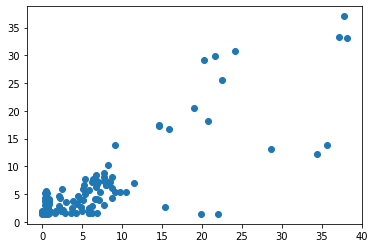

In [103]:
create_model_for_metric('CPU0Idle%')

In [96]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [104]:
cn = mf.columns

interact(create_model_for_metric, columnname=cn);

interactive(children=(Dropdown(description='columnname', options=('worker_give_metrics', 'write_to_csv_time', …

In [119]:
# Csak kiviből kipróbálom, hogy milyen érkeket adna az ő linreg beállításaikkal (nem tom melyik, melyik metric)

bvalues = [[1,0,0],
           [0.9448,0.1072,3.0954],
           [0.8954,0.3220,42.3307],
           [1.1008,0.4017,-20.2569],
           [1.0589,0.5713,1.5306],
           [0.6142,0.1733,26.5175],
           [0.9222,0.2059,1.1572],
           [0.7489,0.2851,18.4977]]

# metrics[i]=np.dot(bvalues[i],[(metrics[i]*w)/(w+k),(metrics[i]*k)/(w+k),1])

metrics = [90, 90, 90, 90, 90, 90]
w = 3
k = 1

m = 1

_cpu = np.dot(bvalues[m],[(metrics[m]*w)/(w+k),(metrics[m]*k)/(w+k),1])

print(_cpu)

# Mivel nem tudom, hogy melyik együtthatótk tartoznak a cpu-hoz ezért nem merem biztosan kijelenteni,
# de úgy tűnik, hogy náluk ha egy VM-t hozzáadok akkor csökken a CPU usage érték és nem nő.

# Ennek lehet az az oka is, hogy a Fibonacci CPU REST API-n tanítottam

69.2814


In [ ]:

# Csak úgy mondom, hogy gyárilag a Request Rate értéket is becsülni kell a linreg modellel

# Ennek az az oka, hogy mivel elosztott terhelés van, valóban előforudhat és elő is fordul,
# hogy ha egy új VM-t becsatolok a rendszerbe akkor az adott gépre kevesebb bejövő kérés
# fog jutni.


In [122]:
mf.columns

Index(['worker_give_metrics', 'write_to_csv_time', 'time', 'response_time_p95',
       'response_time', 'worker_number', 'request_rate', 'CPU0User%',
       'CPU0Idle%', 'CPU0Total%', 'CPU1User%', 'CPU1Idle%', 'CPU1Total%',
       '[DSK:sda]Reads', '[DSK:sda]RMerge', '[DSK:sda]RKBytes',
       '[DSK:sda]WaitR', '[DSK:sda]Writes', '[DSK:sda]WMerge',
       ' [DSK:sda]WKBytes', '[DSK:sda]WaitW', '[DSK:sda]Request',
       '[DSK:sda]QueLen', '[DSK:sda]Wait', '[DSK:sda]SvcTim', '[DSK:sda]Util',
       '[NUMA:0]Used', '[NUMA:0]Free', '[NUMA:0]Slab', '[NUMA:0]Mapped',
       '[NUMA:0]Anon', '[NUMA:0]AnonH', '[NUMA:0]Inactive', ' [NUMA:0]Hits',
       '[TCPD]InReceives', '[TCPD]InDelivers', '[TCPD]OutRequests',
       '[TCPD]InSegs', '[TCPD]OutSegs', 'notification', 'actual_vm_number_was',
       'actual_vm_number_is', 'otime', 'delta_vm'],
      dtype='object')

In [125]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')

In [136]:


train_features = mf[['request_rate', 'CPU0User%', '[DSK:sda]Reads', '[NUMA:0]Anon', '[NUMA:0]AnonH']]

train_labels = mf[['response_time_p95']]

train_labels = mf[['response_time']]


normalizer = tf.keras.layers.Normalization(axis=-1)

normalizer.adapt(np.array(train_features))

print(normalizer.mean.numpy())

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print('Normalized   :', normalizer(first).numpy())

first_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(3),
    layers.Dense(units=1)
])

first_model.summary()

first_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


[[19.416613 88.36346  11.377742 30.24485  29.666449]]
First example: [[ 1.2 39.1 38.1 15.  14.3]]
Normalized   : [[-1.72 -3.35  2.16 -2.64 -2.74]]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_12 (Normaliza  (None, 5)                11        
 tion)                                                           
                                                                 
 dense_9 (Dense)             (None, 5)                 30        
                                                                 
 dense_10 (Dense)            (None, 3)                 18        
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 63
Trainable params: 52
Non-trainable params: 11
__________________________________________

In [141]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    # plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [RT]')
    plt.legend()
    plt.grid(True)

CPU times: user 4.48 s, sys: 162 ms, total: 4.64 s
Wall time: 4.28 s


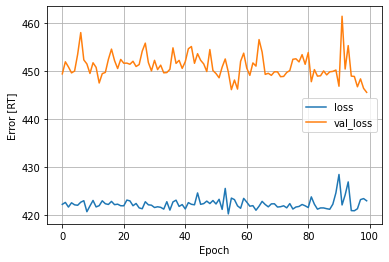

In [142]:
%%time
history = first_model.fit(
    train_features,
    train_labels,
    epochs = 100,
    verbose = 0,
    validation_split = 0.2)

plot_loss(history)

In [143]:
# https://www.tensorflow.org/tutorials/keras/regression